In [37]:
import pandas as pd
# read the dataset
bcw = pd.read_csv("breast-cancer-wisconsin.data", header=None)

In [58]:
# drop first column--code number
bcw_new = bcw.iloc[:,1:11]
# imputated by mean property
for i in range(len(bcw_new)):
    for j in range(len(bcw_new.columns)):
        if(bcw_new.iloc[i,j]=='?'):
            bcw_new.iloc[i,j]=None
            bcw_new.iloc[i,j]=int(bcw_new.iloc[i].mean(skipna=True))
            break
# dataset features
bcw_f = bcw_new.iloc[:,:9]
# dataset label
bcw_l = bcw_new.iloc[:,-1]

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# first split 0.7 train dataset and 0.3 test dataset
train_data, test_data, train_label, test_label = train_test_split(bcw_f, bcw_l,
                                                                  random_state=None, train_size=0.7)
L2 = 0
avg = 0
avg_train = []
avg_test = []
L2_list = []
for _ in range(50):
    if L2 < 3.0:
        L2 = L2 + 0.1
        L2_list.append(L2)
    # Create a SVC classifier using an RBF kernel
    svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=L2)
    # Train the classifier
    svm.fit(train_data, train_label)
    # mean average
    avg = avg + svm.score(test_data, test_label)
    # the information of accuracy of train and test between L2=0.1~3.0
    if len(avg_train) < 30:
        avg_train.append(svm.score(train_data, train_label))
        avg_test.append(svm.score(test_data, test_label))

In [60]:
avg = avg/50
print(avg)

0.9738095238095222


Text(0, 0.5, 'Average (Train)')

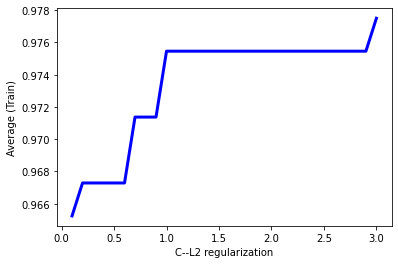

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline
# train avg plot
plt.plot(L2_list, avg_train, color='b', linewidth=3)
plt.xlabel('C--L2 regularization')
plt.ylabel('Average (Train)')

Text(0, 0.5, 'Average (Test)')

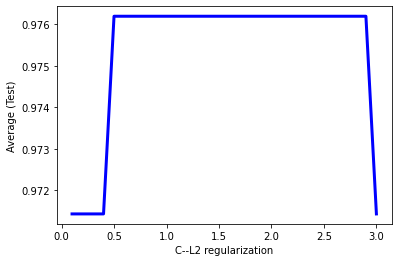

In [62]:
# test avg plot
plt.plot(L2_list, avg_test, color='b', linewidth=3)
plt.xlabel('C--L2 regularization')
plt.ylabel('Average (Test)')